In [1]:
# Fonctions qui génèrent les données, fournies avec le sujet

# %load mp1.py
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from keras.utils import np_utils

# On some implementations of matplotlib, you may need to change this value
IMAGE_SIZE = 72

def generate_a_drawing(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata

def generate_a_rectangle(noise=0.0, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    print(U)
    return generate_a_drawing(figsize, U, V, noise)


def generate_a_disk(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing(figsize, U, V, noise)

def generate_a_triangle(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing(figsize, U, V, noise)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]


def generate_dataset_classification(nb_samples, noise=0.0, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros(nb_samples)
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            X[i] = generate_a_rectangle(noise, free_location)
        elif category == 1: 
            X[i] = generate_a_disk(noise, free_location)
        else:
            [X[i], V] = generate_a_triangle(noise, free_location)
        Y[i] = category
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

def generate_test_set_classification():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_classification(300, 20, True)
    Y_test = np_utils.to_categorical(Y_test, 3) 
    return [X_test, Y_test]

def generate_dataset_regression(nb_samples, noise=0.0):
    # Getting im_size:
    im_size = generate_a_triangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples, 6])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        [X[i], Y[i]] = generate_a_triangle(noise, True)
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

import matplotlib.patches as patches

def visualize_prediction(x, y):
    fig, ax = plt.subplots(figsize=(5, 5))
    I = x.reshape((IMAGE_SIZE,IMAGE_SIZE))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    xy = y.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)

    plt.show()

def generate_test_set_regression():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_regression(300, 20)
    return [X_test, Y_test]

Using TensorFlow backend.


In [2]:
# Génération des données

[X_train, Y_train] = generate_dataset_classification(300, 20)

[0.86898397 0.86898397 0.13101603 0.13101603]
Creating data:
0
[0.87355377 0.87355377 0.12644623 0.12644623]
[0.71143061 0.71143061 0.28856939 0.28856939]
[0.84007239 0.84007239 0.15992761 0.15992761]
[0.93713241 0.93713241 0.06286759 0.06286759]
10
[0.91439933 0.91439933 0.08560067 0.08560067]
[0.77396135 0.77396135 0.22603865 0.22603865]
20
[0.7375859 0.7375859 0.2624141 0.2624141]
[0.93677378 0.93677378 0.06322622 0.06322622]
[0.92204151 0.92204151 0.07795849 0.07795849]
[0.72230896 0.72230896 0.27769104 0.27769104]
30
[0.70155193 0.70155193 0.29844807 0.29844807]
[0.90120283 0.90120283 0.09879717 0.09879717]
40
[0.76964059 0.76964059 0.23035941 0.23035941]
[0.80472617 0.80472617 0.19527383 0.19527383]
[0.92078536 0.92078536 0.07921464 0.07921464]
[0.74303672 0.74303672 0.25696328 0.25696328]
50
[0.80210104 0.80210104 0.19789896 0.19789896]
[0.74532737 0.74532737 0.25467263 0.25467263]
60
[0.88468102 0.88468102 0.11531898 0.11531898]
[0.7125116 0.7125116 0.2874884 0.2874884]
[0.8802

In [4]:
# Formattage des labels

Y_train = np_utils.to_categorical(Y_train, 3)
print(Y_train.shape)

(300, 3)


In [5]:
# Définition d'un réseau à une couche pour classifier les formes

from keras.models import Sequential
from keras.layers import Dense, Activation

lin_classifier = Sequential([Dense(3, input_shape=(IMAGE_SIZE * IMAGE_SIZE, )), Activation('softmax')])

from keras.optimizers import SGD

sgd = SGD(lr=0.01,
decay=1e-6, momentum=0.9,
nesterov=True)


lin_classifier.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
# Apprentissage

X_train = X_train.reshape(300, IMAGE_SIZE * IMAGE_SIZE)
lin_classifier.fit(X_train, Y_train, epochs=40, batch_size=32)

Epoch 1/40
300/300 [==============================] - 1s 5ms/step - loss: 2.3994 - acc: 0.3300
Epoch 2/40
300/300 [==============================] - 0s 114us/step - loss: 1.0824 - acc: 0.5133
Epoch 3/40
300/300 [==============================] - 0s 104us/step - loss: 0.7179 - acc: 0.6367
Epoch 4/40
300/300 [==============================] - 0s 118us/step - loss: 0.5265 - acc: 0.7733
Epoch 5/40
300/300 [==============================] - 0s 111us/step - loss: 0.4093 - acc: 0.8033
Epoch 6/40
300/300 [==============================] - 0s 107us/step - loss: 0.3299 - acc: 0.9300
Epoch 7/40
300/300 [==============================] - 0s 129us/step - loss: 0.3280 - acc: 0.8567
Epoch 8/40
300/300 [==============================] - 0s 104us/step - loss: 0.2656 - acc: 0.9267
Epoch 9/40
300/300 [==============================] - 0s 124us/step - loss: 0.2338 - acc: 0.9567
Epoch 10/40
300/300 [==============================] - 0s 130us/step - loss: 0.2119 - acc: 0.9400
Epoch 11/40
300/300 [==========

In [7]:
# Test sur la première entrée

print(lin_classifier.predict(X_train[0].reshape(1,IMAGE_SIZE * IMAGE_SIZE)))
print(Y_train[0])

[[9.8495328e-01 1.4577670e-02 4.6903573e-04]]
[1. 0. 0.]


In [8]:
# Test sur un disque généré aléatoirement

X_test = generate_a_disk(20)
X_test = (X_test + 20) / (255 + 2 * 20)
print(lin_classifier.predict(X_test.reshape(1, IMAGE_SIZE* IMAGE_SIZE)))

[[0.08562587 0.9131874  0.00118667]]


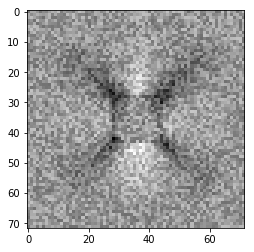

In [9]:
# Matrice de poids du classifieur linéaire

M = lin_classifier.get_weights()[0]

plt.imshow(M[:,0].reshape(72,72), cmap = 'gray')


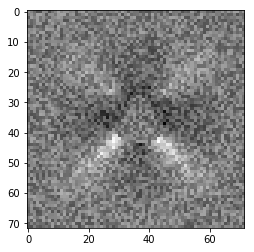

In [10]:
plt.imshow(M[:,1].reshape(72,72), cmap = 'gray')

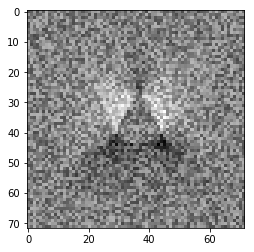

In [11]:
plt.imshow(M[:,2].reshape(72,72), cmap = 'gray')

In [14]:
# On peut voir une forme carrée/rectangulaire dans la première matrice de poids, 
# une forme circulaire dans la deuxième et une forme triangulaire dans la troisième,
# ce qui semble cohérent avec les formes que celles-ci doivent détecter.

In [12]:
#############################################
## 5 A more difficult classification problem
#############################################

# Génération des données, cette fois avec 1000 exemples

[X_train, Y_train] = generate_dataset_classification(1000, 20, True)

Y_train = np_utils.to_categorical(Y_train, 3)

[0.65561236 0.65561236 0.34438764 0.34438764]
Creating data:
0
[0.28684744 0.28684744 0.28225403 0.28225403]
[0.47917143 0.47917143 0.30655971 0.30655971]
[0.59941784 0.59941784 0.41914159 0.41914159]
[0.80084699 0.80084699 0.06800255 0.06800255]
[0.51913117 0.51913117 0.34994906 0.34994906]
10
[0.35681688 0.35681688 0.21562559 0.21562559]
[0.88189044 0.88189044 0.15013228 0.15013228]
[0.80557077 0.80557077 0.03821631 0.03821631]
[0.59911583 0.59911583 0.19087454 0.19087454]
[0.8120428  0.8120428  0.50659798 0.50659798]
20
[0.73505156 0.73505156 0.58259748 0.58259748]
[0.76426481 0.76426481 0.6707238  0.6707238 ]
[0.43452101 0.43452101 0.30264487 0.30264487]
30
[0.70543276 0.70543276 0.1357466  0.1357466 ]
[0.43135737 0.43135737 0.06849461 0.06849461]
[0.95510046 0.95510046 0.95087916 0.95087916]
[0.78327071 0.78327071 0.70228813 0.70228813]
[0.93286011 0.93286011 0.47345332 0.47345332]
40
[0.56698436 0.56698436 0.24769608 0.24769608]
[0.86777285 0.86777285 0.57452812 0.57452812]
[0.95

530
[0.26640558 0.26640558 0.16921438 0.16921438]
[0.63725674 0.63725674 0.1276636  0.1276636 ]
540
[0.34680319 0.34680319 0.02850635 0.02850635]
[0.9773533  0.9773533  0.20572446 0.20572446]
550
[0.95067701 0.95067701 0.65668049 0.65668049]
[0.23597183 0.23597183 0.16295642 0.16295642]
[0.37792212 0.37792212 0.20713995 0.20713995]
[0.15224113 0.15224113 0.07145382 0.07145382]
[0.6490034  0.6490034  0.17269439 0.17269439]
[0.32697093 0.32697093 0.11487486 0.11487486]
560
[0.94963259 0.94963259 0.02052055 0.02052055]
570
[0.62216675 0.62216675 0.50340551 0.50340551]
[0.66072021 0.66072021 0.60688403 0.60688403]
580
[0.97439701 0.97439701 0.06471378 0.06471378]
[0.44652534 0.44652534 0.13724401 0.13724401]
[0.47459425 0.47459425 0.25707675 0.25707675]
590
[0.49809629 0.49809629 0.16406987 0.16406987]
[0.66995483 0.66995483 0.0708717  0.0708717 ]
[0.1743536  0.1743536  0.02769005 0.02769005]
[0.23292979 0.23292979 0.10629928 0.10629928]
600
[0.8881911 0.8881911 0.5527535 0.5527535]
[0.689

In [13]:
# Apprentissage

lin_classifier.fit(X_train, Y_train, epochs=50, batch_size=32)

Epoch 1/50
1000/1000 [==============================] - 0s 93us/step - loss: 2.3062 - acc: 0.3710
Epoch 2/50
1000/1000 [==============================] - 0s 94us/step - loss: 1.5466 - acc: 0.4540
Epoch 3/50
1000/1000 [==============================] - 0s 98us/step - loss: 1.2583 - acc: 0.4940
Epoch 4/50
1000/1000 [==============================] - 0s 99us/step - loss: 1.1548 - acc: 0.5360
Epoch 5/50
1000/1000 [==============================] - 0s 92us/step - loss: 0.9531 - acc: 0.5620
Epoch 6/50
1000/1000 [==============================] - 0s 87us/step - loss: 1.0950 - acc: 0.5580
Epoch 7/50
1000/1000 [==============================] - 0s 80us/step - loss: 0.9199 - acc: 0.5860
Epoch 8/50
1000/1000 [==============================] - 0s 88us/step - loss: 0.8741 - acc: 0.6040
Epoch 9/50
1000/1000 [==============================] - 0s 97us/step - loss: 1.0160 - acc: 0.5610
Epoch 10/50
1000/1000 [==============================] - 0s 86us/step - loss: 0.7906 - acc: 0.6210
Epoch 11/50
1000/10

In [14]:
# Génération des données de test

[X_test, Y_test] = generate_test_set_classification()


[0.78108904 0.78108904 0.21891096 0.21891096]
Creating data:
0
[0.55994044 0.55994044 0.292181   0.292181  ]
[0.66056205 0.66056205 0.49354949 0.49354949]
[0.98146899 0.98146899 0.43664688 0.43664688]
10
[0.36214257 0.36214257 0.28061879 0.28061879]
20
[0.78924449 0.78924449 0.02933508 0.02933508]
[0.83129099 0.83129099 0.54494772 0.54494772]
[0.28672369 0.28672369 0.09330854 0.09330854]
[0.74900847 0.74900847 0.72351406 0.72351406]
30
[0.97888981 0.97888981 0.85672666 0.85672666]
[0.84770985 0.84770985 0.16551577 0.16551577]
[0.50076711 0.50076711 0.42682993 0.42682993]
40
[0.62274465 0.62274465 0.03725033 0.03725033]
[0.32382425 0.32382425 0.28756509 0.28756509]
[0.21391182 0.21391182 0.10366733 0.10366733]
[0.61154591 0.61154591 0.54101008 0.54101008]
[0.56287138 0.56287138 0.22613136 0.22613136]
50
[0.77388209 0.77388209 0.15142816 0.15142816]
[0.80905807 0.80905807 0.38983695 0.38983695]
[0.55819409 0.55819409 0.10323261 0.10323261]
[0.9525003  0.9525003  0.35754931 0.35754931]
60

In [15]:
# Evaluation des performances sur les données de test

lin_classifier.evaluate(X_test, Y_test)

300/300 [==============================] - 0s 142us/step


[1.125960046450297, 0.536666667064031]

In [16]:
# Construction d'un réseau de neurones convolutif pour la classification

conv_classifier = Sequential()

from keras.layers import Conv2D, MaxPooling2D, Flatten

conv_classifier.add(Conv2D(16, (5,5), activation='relu', input_shape = (IMAGE_SIZE, IMAGE_SIZE, 1)))
conv_classifier.add(MaxPooling2D(pool_size = (4,4)))

conv_classifier.add(Flatten())

conv_classifier.add(Dense(3, activation='softmax'))



conv_classifier.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
# Reformattage des images

X_train = X_train.reshape(1000, IMAGE_SIZE, IMAGE_SIZE, 1)
print(X_train.shape)

(1000, 72, 72, 1)


In [18]:
# Apprentissage

conv_classifier.fit(X_train, Y_train, epochs=50, batch_size=32)

# Temps sur mon ordinateur : 1 min 30

Epoch 1/50
1000/1000 [==============================] - 2s 2ms/step - loss: 1.0481 - acc: 0.5530
Epoch 2/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.8457 - acc: 0.6860
Epoch 3/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.7386 - acc: 0.7010
Epoch 4/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6680 - acc: 0.7480
Epoch 5/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6115 - acc: 0.7740
Epoch 6/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.5747 - acc: 0.7880
Epoch 7/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.5331 - acc: 0.8050
Epoch 8/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.4838 - acc: 0.8410
Epoch 9/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.4653 - acc: 0.8480
Epoch 10/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.4615 - acc: 0.8270
Epoch 11/50
1000/1000 [======

In [19]:
conv_classifier.evaluate(X_test.reshape(X_test.shape[0], IMAGE_SIZE, IMAGE_SIZE, 1), Y_test)

# Les résultats sont très clairement meilleurs pour ce modèle

300/300 [==============================] - 0s 1ms/step


[0.20528909881909688, 0.9133333325386047]

In [20]:
############################
## 6 A regression problem
############################

# Génération des données d'apprentissage

[X_train, Y_train] = generate_dataset_regression(4000, 20)

# Remarque : la génération d'un tel nombre d'images est lourde et fait parfois planter mon ordinateur


Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
2040
2050
2060
2070
2080
2090
2100
2110
2120
2130
2140
2150
2160
2170
2180
2

In [21]:
# Tri des sommets, en commençant par le sommet le plus à droite puis dans le sens trigonométrique

[N, M] = Y_train.shape
for n in range(N):
    x = 0
    j = 0
    for i in range(3):
        if Y_train[n][2*i] > x:
            x = Y_train[n][2*i]
            j = i
        
    Y_train[n] = np.concatenate((Y_train[n][2*j:(2*j+2)], np.delete(Y_train[n],[2*j, 2*j + 1])))
    
    x = Y_train[n]
    theta = np.arctan2((x[2]-x[0])*(x[5]-x[1]) - (x[4]-x[0])*(x[3]-x[1]), (x[2]-x[0])*(x[4]-x[0]) + (x[3]-x[1])*(x[5]-x[1]))
    
    if theta < 0:
        Y_train[n] = np.concatenate((Y_train[n][0:2], Y_train[n][4:6], Y_train[n][2:4]))





In [22]:
# Construction d'un réseau de neurones convolutif

from keras.layers import Dense, Conv2D, Dropout, MaxPooling2D, Flatten

localise_sommets = Sequential()
localise_sommets.add(Conv2D(16, (3,3), activation='relu', input_shape = (IMAGE_SIZE, IMAGE_SIZE, 1)))

localise_sommets.add(MaxPooling2D(pool_size = (2,2)))

localise_sommets.add(Conv2D(32, (3,3), activation='relu'))

localise_sommets.add(MaxPooling2D(pool_size = (2,2)))

localise_sommets.add(Conv2D(64, (3,3), activation='relu'))

localise_sommets.add(MaxPooling2D(pool_size = (2,2)))

localise_sommets.add(Conv2D(128, (2,2), activation='relu'))

localise_sommets.add(MaxPooling2D(pool_size = (2,2)))

localise_sommets.add(Dropout(0.25))

localise_sommets.add(Flatten())

localise_sommets.add(Dense(128, activation='relu'))

localise_sommets.add(Dropout(0.5))

localise_sommets.add(Dense(6))

localise_sommets.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 70, 70, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 6, 6, 128)         32896     
__________

In [23]:
# Génération des données de test

[X_test, Y_test] = generate_test_set_regression()

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [25]:
# On ordonne les sommets du test set de la même manière que pour le train set

[N, M] = Y_test.shape
for n in range(N):
    x = 0
    j = 0
    for i in range(3):
        if Y_test[n][2*i] > x:
            x = Y_test[n][2*i]
            j = i
        
    Y_test[n] = np.concatenate((Y_test[n][2*j:(2*j+2)], np.delete(Y_test[n],[2*j, 2*j + 1])))
    
    x = Y_test[n]
    theta = np.arctan2((x[2]-x[0])*(x[5]-x[1]) - (x[4]-x[0])*(x[3]-x[1]), (x[2]-x[0])*(x[4]-x[0]) + (x[3]-x[1])*(x[5]-x[1]))
    
    if theta < 0:
        Y_test[n] = np.concatenate((Y_test[n][0:2], Y_test[n][4:6], Y_test[n][2:4]))



In [24]:
# Apprentissage

localise_sommets.compile(loss='mean_squared_error', optimizer='adam')
X_train = X_train.reshape(X_train.shape[0], IMAGE_SIZE, IMAGE_SIZE, 1)
localise_sommets.fit(X_train, Y_train, epochs=50, batch_size=32)

# Remarque : l'apprentissage est long (un quart d'heure sur mon ordinateur)

Epoch 1/50
4000/4000 [==============================] - 16s 4ms/step - loss: 0.0724
Epoch 2/50
4000/4000 [==============================] - 14s 3ms/step - loss: 0.0388
Epoch 3/50
4000/4000 [==============================] - 14s 3ms/step - loss: 0.0316
Epoch 4/50
4000/4000 [==============================] - 14s 3ms/step - loss: 0.0274
Epoch 5/50
4000/4000 [==============================] - 14s 3ms/step - loss: 0.0247
Epoch 6/50
4000/4000 [==============================] - 14s 4ms/step - loss: 0.0228
Epoch 7/50
4000/4000 [==============================] - 14s 4ms/step - loss: 0.0210
Epoch 8/50
4000/4000 [==============================] - 14s 4ms/step - loss: 0.0199
Epoch 9/50
4000/4000 [==============================] - 14s 4ms/step - loss: 0.0189
Epoch 10/50
4000/4000 [==============================] - 14s 4ms/step - loss: 0.0175
Epoch 11/50
4000/4000 [==============================] - 14s 4ms/step - loss: 0.0171
Epoch 12/50
4000/4000 [==============================] - 14s 4ms/step - lo

In [27]:
print(localise_sommets.predict(X_train[1].reshape(1, IMAGE_SIZE, IMAGE_SIZE, 1)))
print(Y_train[1])

[[0.7156981  0.8345864  0.5362083  0.4489023  0.43793464 0.17814831]]
[0.7038634  0.81296351 0.58829464 0.59343957 0.4359042  0.16256266]


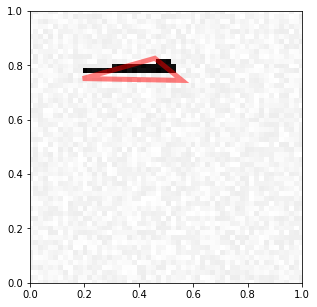

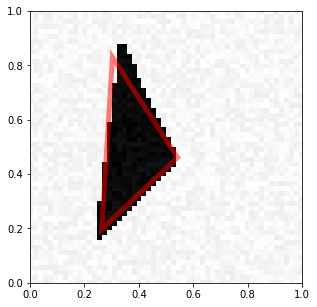

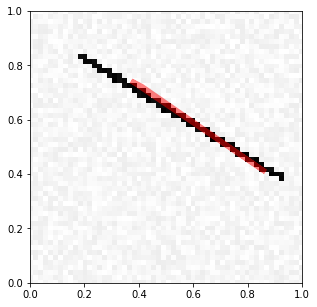

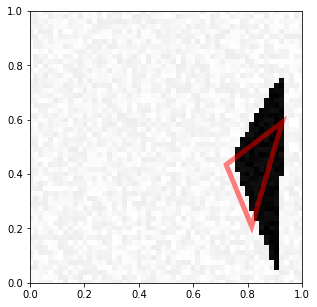

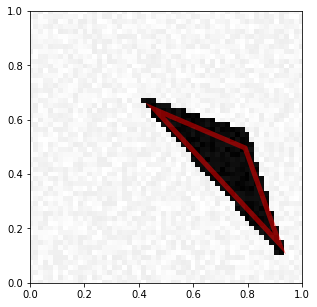

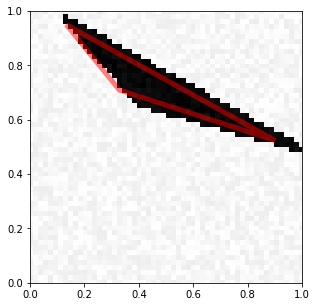

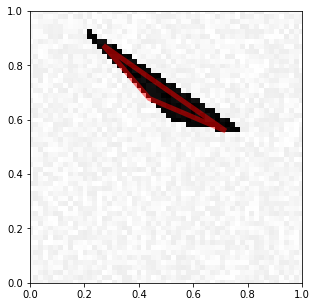

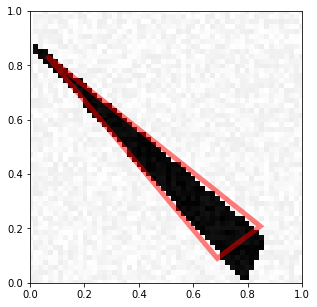

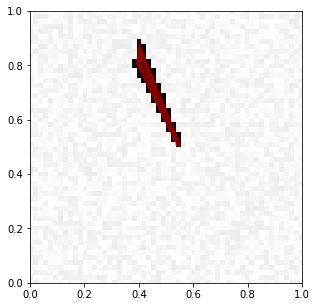

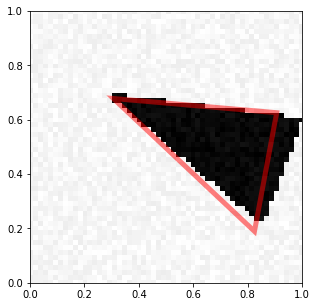

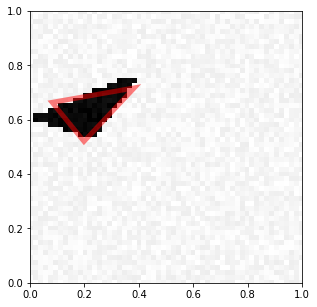

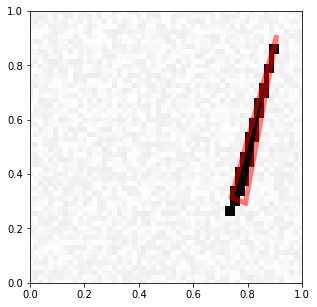

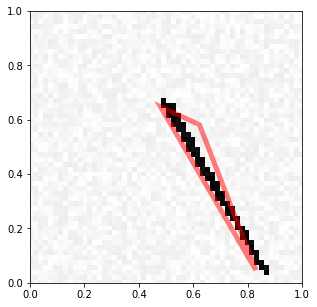

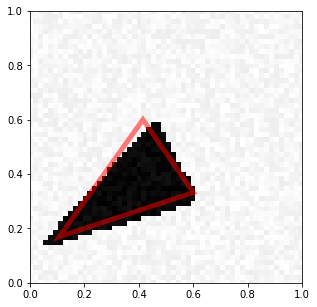

In [28]:
for i in range(1,15):
    visualize_prediction(X_test[i], localise_sommets.predict(X_test[i].reshape(1, IMAGE_SIZE, IMAGE_SIZE, 1)))

In [29]:
# Remarque : les sommets des triangles ont été ordonnés en commençant par le plus à droite, puis en 
# tournant dans le sens trigonométrique. Il y a donc une discontinuité pour les triangles qui possèdent
# un côté vertical sur la droite, pour lesquels il y a 2 potentiels "sommet le plus à droite". 
# Sur ce type de triangle, les sommets sont donc souvent mal positionnés par le réseau de neurones.

In [30]:
######################################
# 7 Image Denoising
######################################

# Nouvelles fonctions de génération de figures, cette fois avec un bruit aléatoire

import numpy as np
import matplotlib.pyplot as plt

IMAGE_SIZE = 72

def generate_a_drawing(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata

def generate_a_noisy_rectangle(free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    noise = np.random.randint(150)
    return [generate_a_drawing(figsize, U, V, noise)/(255 + 2*noise), generate_a_drawing(figsize, U, V, 0)/255]


def generate_a_noisy_disk(free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    noise = np.random.randint(150)
    return [generate_a_drawing(figsize, U, V, noise)/(255 + 2*noise), generate_a_drawing(figsize, U, V, 0)/255]

def generate_a_noisy_triangle(free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    noise = np.random.randint(150)
    return [generate_a_drawing(figsize, U, V, noise)/(255 + 2*noise), generate_a_drawing(figsize, U, V, 0)/255]

def generate_dataset_denoising(nb_samples):
    # Getting im_size:
    im_size = generate_a_noisy_rectangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples,im_size])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            [X[i], Y[i]] = generate_a_noisy_rectangle(True)
        elif category == 1:
            [X[i], Y[i]] = generate_a_noisy_disk(True)
        else:
            [X[i], Y[i]] = generate_a_noisy_triangle(True)
    return [X, Y]

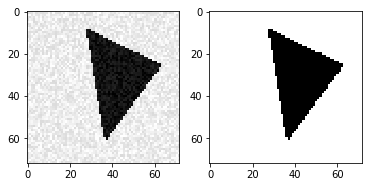

In [33]:
# Exemple de génération de triangle bruité

[I1, I2] = generate_a_noisy_triangle(True)
plt.subplot(121)
plt.imshow(I1.reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')
plt.subplot(122)
plt.imshow(I2.reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')


In [34]:
# Génération des données de test

[X, Y] = generate_dataset_denoising(300)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [42]:
# Construction d'un réseau de neurones convolutif de type autoencoder

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D

model = Sequential()

model.add(Conv2D(32, (4,4), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 1), padding='same'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (4,4), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 1), padding='same'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (4,4), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 1), padding='same'))

model.add(Conv2D(128, (4,4), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 1), padding='same'))

model.add(UpSampling2D((2,2)))

model.add(Conv2D(64, (4,4), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 1), padding='same'))

model.add(UpSampling2D((2,2)))

model.add(Conv2D(1, (4,4), activation='sigmoid', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 1), padding='same'))


from keras.optimizers import RMSprop
model.compile(loss='mean_squared_error', optimizer=RMSprop())

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 72, 72, 32)        544       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 36, 36, 64)        32832     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 18, 18, 128)       131200    
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 18, 18, 128)       262272    
_________________________________________________________________
up_sampling2d_9 (UpSampling2 (None, 36, 36, 128)       0         
__________

In [43]:
# Apprentissage

Y = Y.reshape(-1, IMAGE_SIZE, IMAGE_SIZE, 1)
X = X.reshape(-1, IMAGE_SIZE, IMAGE_SIZE, 1)
model.fit(X, Y, epochs = 50, batch_size = 32)


# Attention : le training est long

Epoch 1/50
300/300 [==============================] - 27s 91ms/step - loss: 0.1355
Epoch 2/50
300/300 [==============================] - 23s 76ms/step - loss: 0.1227
Epoch 3/50
300/300 [==============================] - 23s 76ms/step - loss: 0.0971
Epoch 4/50
300/300 [==============================] - 23s 76ms/step - loss: 0.1062
Epoch 5/50
300/300 [==============================] - 23s 76ms/step - loss: 0.0888
Epoch 6/50
300/300 [==============================] - 23s 76ms/step - loss: 0.0727
Epoch 7/50
300/300 [==============================] - 23s 76ms/step - loss: 0.0730
Epoch 8/50
300/300 [==============================] - 23s 78ms/step - loss: 0.0432
Epoch 9/50
300/300 [==============================] - 23s 77ms/step - loss: 0.0289
Epoch 10/50
300/300 [==============================] - 23s 77ms/step - loss: 0.0216
Epoch 11/50
300/300 [==============================] - 23s 76ms/step - loss: 0.0210
Epoch 12/50
300/300 [==============================] - 23s 77ms/step - loss: 0.0138
E

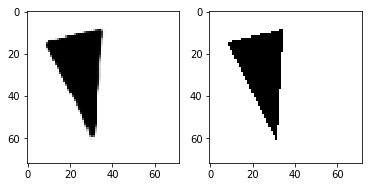

In [49]:
[x,y]= generate_a_noisy_triangle(True)
prediction = model.predict(x.reshape(1,IMAGE_SIZE, IMAGE_SIZE, 1))

plt.subplot(121)
plt.imshow(prediction.reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')
plt.subplot(122)
plt.imshow(y.reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')


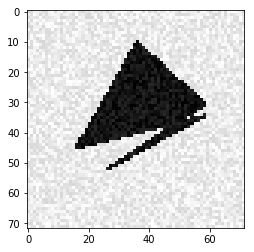

In [54]:
# Test sur des formes plus compliquées

U = np.random.rand(5)
V = np.random.rand(5)

x = generate_a_drawing(1, U, V, noise=50)


prediction = model.predict(x.reshape(1,IMAGE_SIZE, IMAGE_SIZE, 1))

plt.imshow(x.reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')

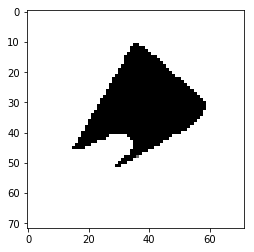

In [55]:
plt.imshow(prediction.reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')
